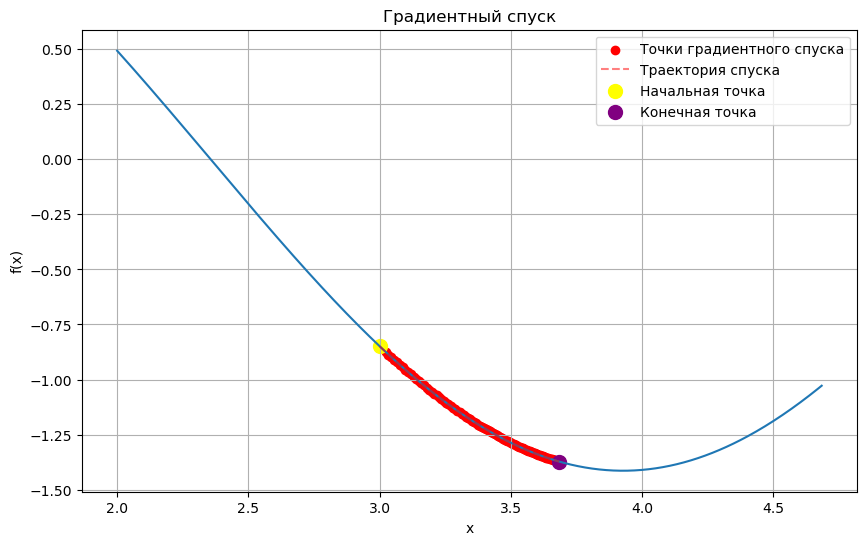

Найденный минимум: x = 3.6838, f(x) = -1.3726
speed: 0.9999995231628418


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Функция: f(x) = sin(x) + cos(x)
# Производная: f'(x) = -sin(x) + cos(x)

def gradientDescend(func=lambda x: x ** 2, diffFunc=lambda x: 2 * x,
                    x0=3, speed=0.01, epochs=100):
    xList = []
    yList = []
    x = x0
    for _ in range(epochs):
        xList.append(x)
        yList.append(func(x))
        x = x - speed * diffFunc(x)
    return xList, yList


def plot_results(xList, yList, func):
    x_vals = np.linspace(min(xList) - 1, max(xList) + 1, 400)
    y_vals = func(x_vals)
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals)
    plt.scatter(xList, yList, color='red', label='Точки градиентного спуска')
    plt.plot(xList, yList, '--', color='red', alpha=0.5, label='Траектория спуска')
    plt.scatter([xList[0]], [yList[0]], color='yellow', s=100, label='Начальная точка')
    plt.scatter([xList[-1]], [yList[-1]], color='purple', s=100, label='Конечная точка')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Градиентный спуск')
    plt.legend()
    plt.grid(True)
    plt.show()


def find_critical_speed(func, diffFunc, x0=3, epochs=100, tol=1e-2):
    low = 0.0
    high = 1.0
    target_min = -0.45
    for _ in range(20):
        mid = (low + high) / 2
        xList, _ = gradientDescend(func, diffFunc, x0, mid, epochs)
        final_x = xList[-1]
        if abs(final_x - target_min) < tol:
            high = mid
        else:
            low = mid
    return (low + high) / 2


func = lambda x: np.sin(x) + np.cos(x)
diffFunc = lambda x: -np.sin(x) + np.cos(x)
xList, yList = gradientDescend(func, diffFunc)
plot_results(xList, yList, func)
print(f"Найденный минимум: x = {xList[-1]:.4f}, f(x) = {yList[-1]:.4f}")
print(f"speed: {find_critical_speed(func, diffFunc)}")